# Comparison between Minstrel-Plus optimizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
all_packets_path = "minstrel_plus-sensitive/ap_all_packets.csv"
sta_packets_path = "minstrel_plus-sensitive/sta_all_packets.csv"
all_packets = pd.read_csv(all_packets_path)
sta_packets = pd.read_csv(sta_packets_path)
all_packets_path_plus = "minstrel_plus-new-rateANDsensitive/ap_all_packets.csv"
sta_packets_path_plus = "minstrel_plus-new-rateANDsensitive/sta_all_packets.csv"
all_packets_plus = pd.read_csv(all_packets_path_plus)
sta_packets_plus = pd.read_csv(sta_packets_path_plus)

In [3]:
filter_condition = all_packets["Protocol"] == "UDP"
filter_condition_plus = all_packets_plus["Protocol"] == "UDP"
udp_packets = all_packets[filter_condition == True]
udp_packets_plus = all_packets_plus[filter_condition_plus == True]
sta_filter_condition = sta_packets["Protocol"] == "UDP"
sta_filter_condition_plus = sta_packets_plus["Protocol"] == "UDP"
sta_packets = sta_packets[sta_filter_condition == True]
sta_packets_plus = sta_packets_plus[sta_filter_condition_plus == True]

In [4]:
print(len(udp_packets))
print(len(udp_packets_plus))

157922
152686


In [5]:
print(udp_packets.head())
print(udp_packets_plus.head())

    No.      Time       Source  Destination Protocol  Length  Sequence number  \
15   16  0.407359  192.168.1.1  192.168.1.2      UDP    1524              0.0   
16   17  0.407359  192.168.1.1  192.168.1.2      UDP    1524              1.0   
17   18  0.407359  192.168.1.1  192.168.1.2      UDP    1524              2.0   
18   19  0.407359  192.168.1.1  192.168.1.2      UDP    1524              3.0   
19   20  0.407359  192.168.1.1  192.168.1.2      UDP    1524              4.0   

    MCS index  A-MPDU reference number                             Retry  
15        6.0                      0.0  Frame is not being retransmitted  
16        6.0                      0.0  Frame is not being retransmitted  
17        6.0                      0.0  Frame is not being retransmitted  
18        6.0                      0.0  Frame is not being retransmitted  
19        6.0                      0.0  Frame is not being retransmitted  
    No.      Time       Source  Destination Protocol  Length  S

In [6]:
time = udp_packets["Time"]
sequence_numbers = udp_packets["Sequence number"]
retries = udp_packets["Retry"]
mcs_values = udp_packets["MCS index"]
data = sta_packets["Length"]
ampdu_ref = udp_packets["A-MPDU reference number"]
sta_time = sta_packets["Time"]
sta_data = sta_packets["Length"]

time_plus = udp_packets_plus["Time"]
sequence_numbers_plus = udp_packets_plus["Sequence number"]
retries_plus = udp_packets_plus["Retry"]
mcs_values_plus = udp_packets_plus["MCS index"]
data_plus = sta_packets_plus["Length"]
ampdu_ref_plus = udp_packets_plus["A-MPDU reference number"]
sta_time_plus = sta_packets_plus["Time"]

In [7]:
print(sequence_numbers.isna().sum())
print(sequence_numbers_plus.isna().sum())

0
0


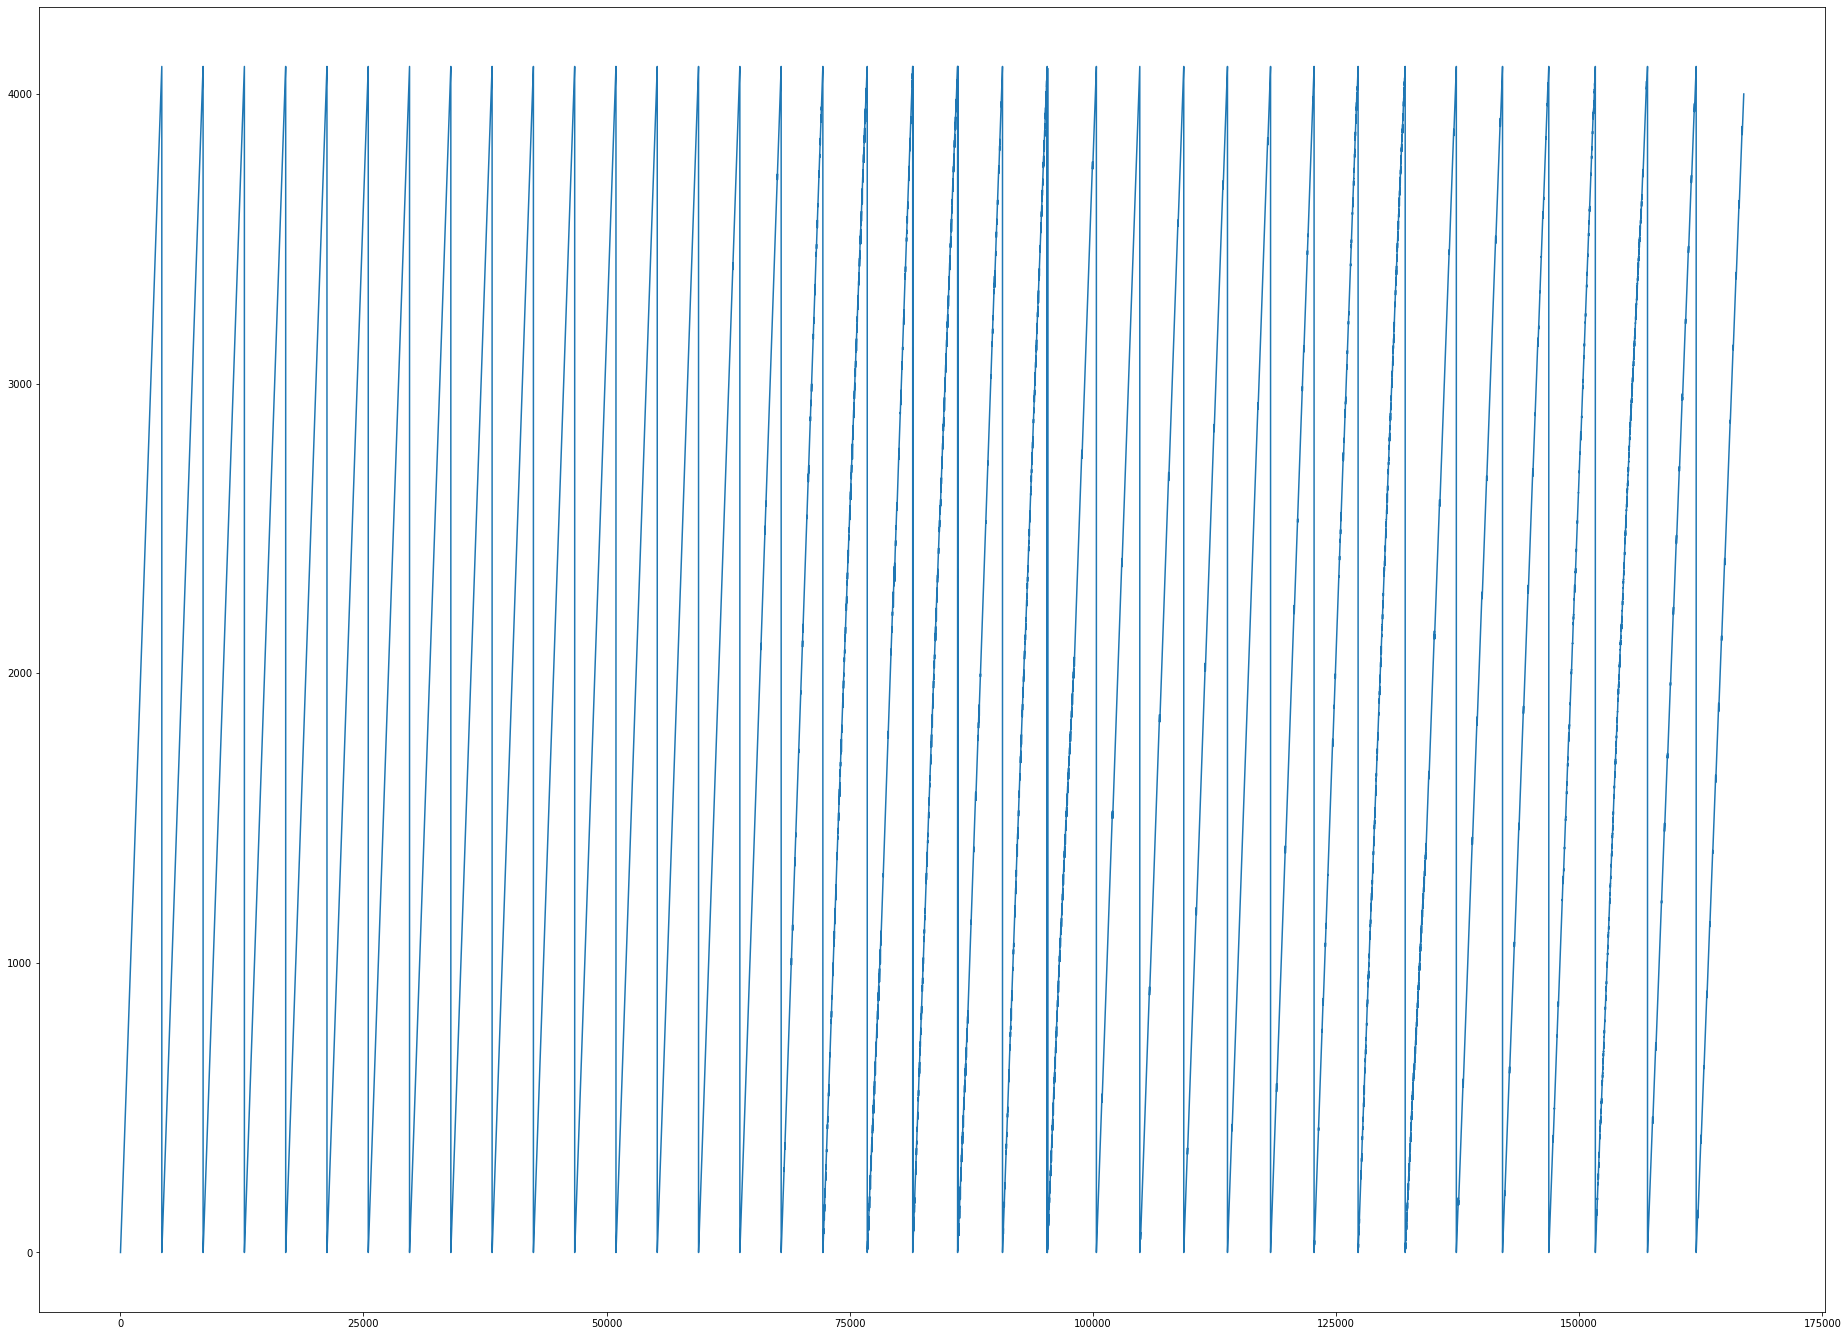

In [8]:
plt.figure(figsize=(32, 24))
plt.plot(sequence_numbers)
plt.show()

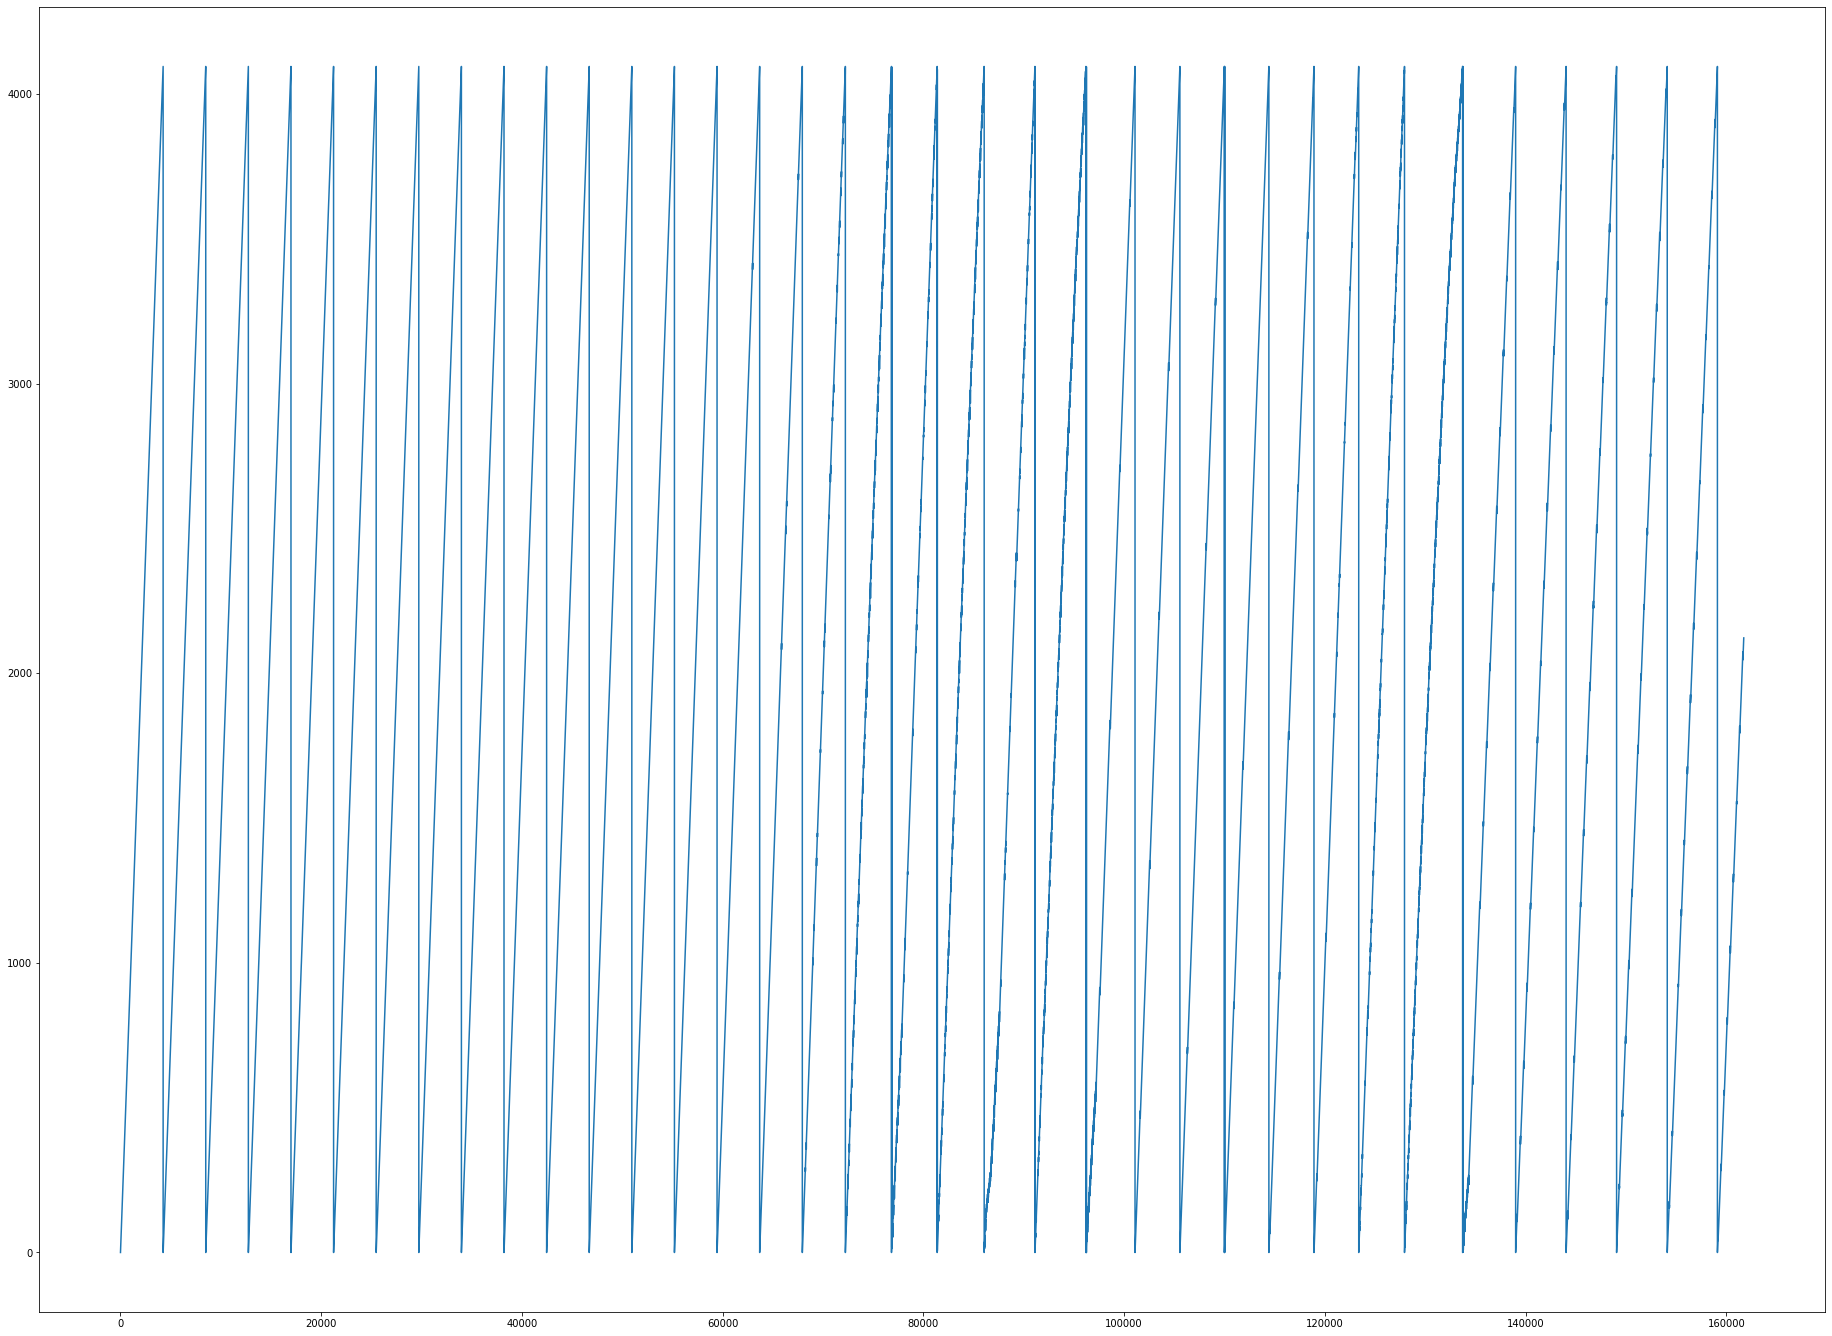

In [9]:
plt.figure(figsize=(32, 24))
plt.plot(sequence_numbers_plus)
plt.show()

In [10]:
def unroll(seq_nums, udp_packets):
    max_seq_num = 4096
    transition_region = max_seq_num/4
    transition_threshold = max_seq_num/2
    counter = 0
    counter_hyst = 0
    new_seq_num = []
    
    for _, seq_num in seq_nums.items():
        if seq_num >= 0 and seq_num <= transition_threshold and counter_hyst != 0:
            new_seq_num.append(seq_num + counter*max_seq_num)
        elif seq_num > transition_threshold and counter_hyst != 0:
            new_seq_num.append(seq_num + (counter - 1)*max_seq_num)
        else:
            new_seq_num.append(seq_num + counter*max_seq_num)
            
        if seq_num == max_seq_num - 1 and counter_hyst == 0:
            counter += 1
            counter_hyst = 1
        elif counter_hyst > 0:
            counter_hyst += 1
        
        if counter_hyst >= transition_region:
            counter_hyst = 0
            
    udp_packets["New Sequence number"] = new_seq_num

In [11]:
unroll(sequence_numbers, udp_packets)
unroll(sequence_numbers_plus, udp_packets_plus)

/home/EU/dedevarr/NS3-analysis/nsvenv/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
new_sequence_numbers = udp_packets["New Sequence number"]
new_sequence_numbers_plus = udp_packets_plus["New Sequence number"]

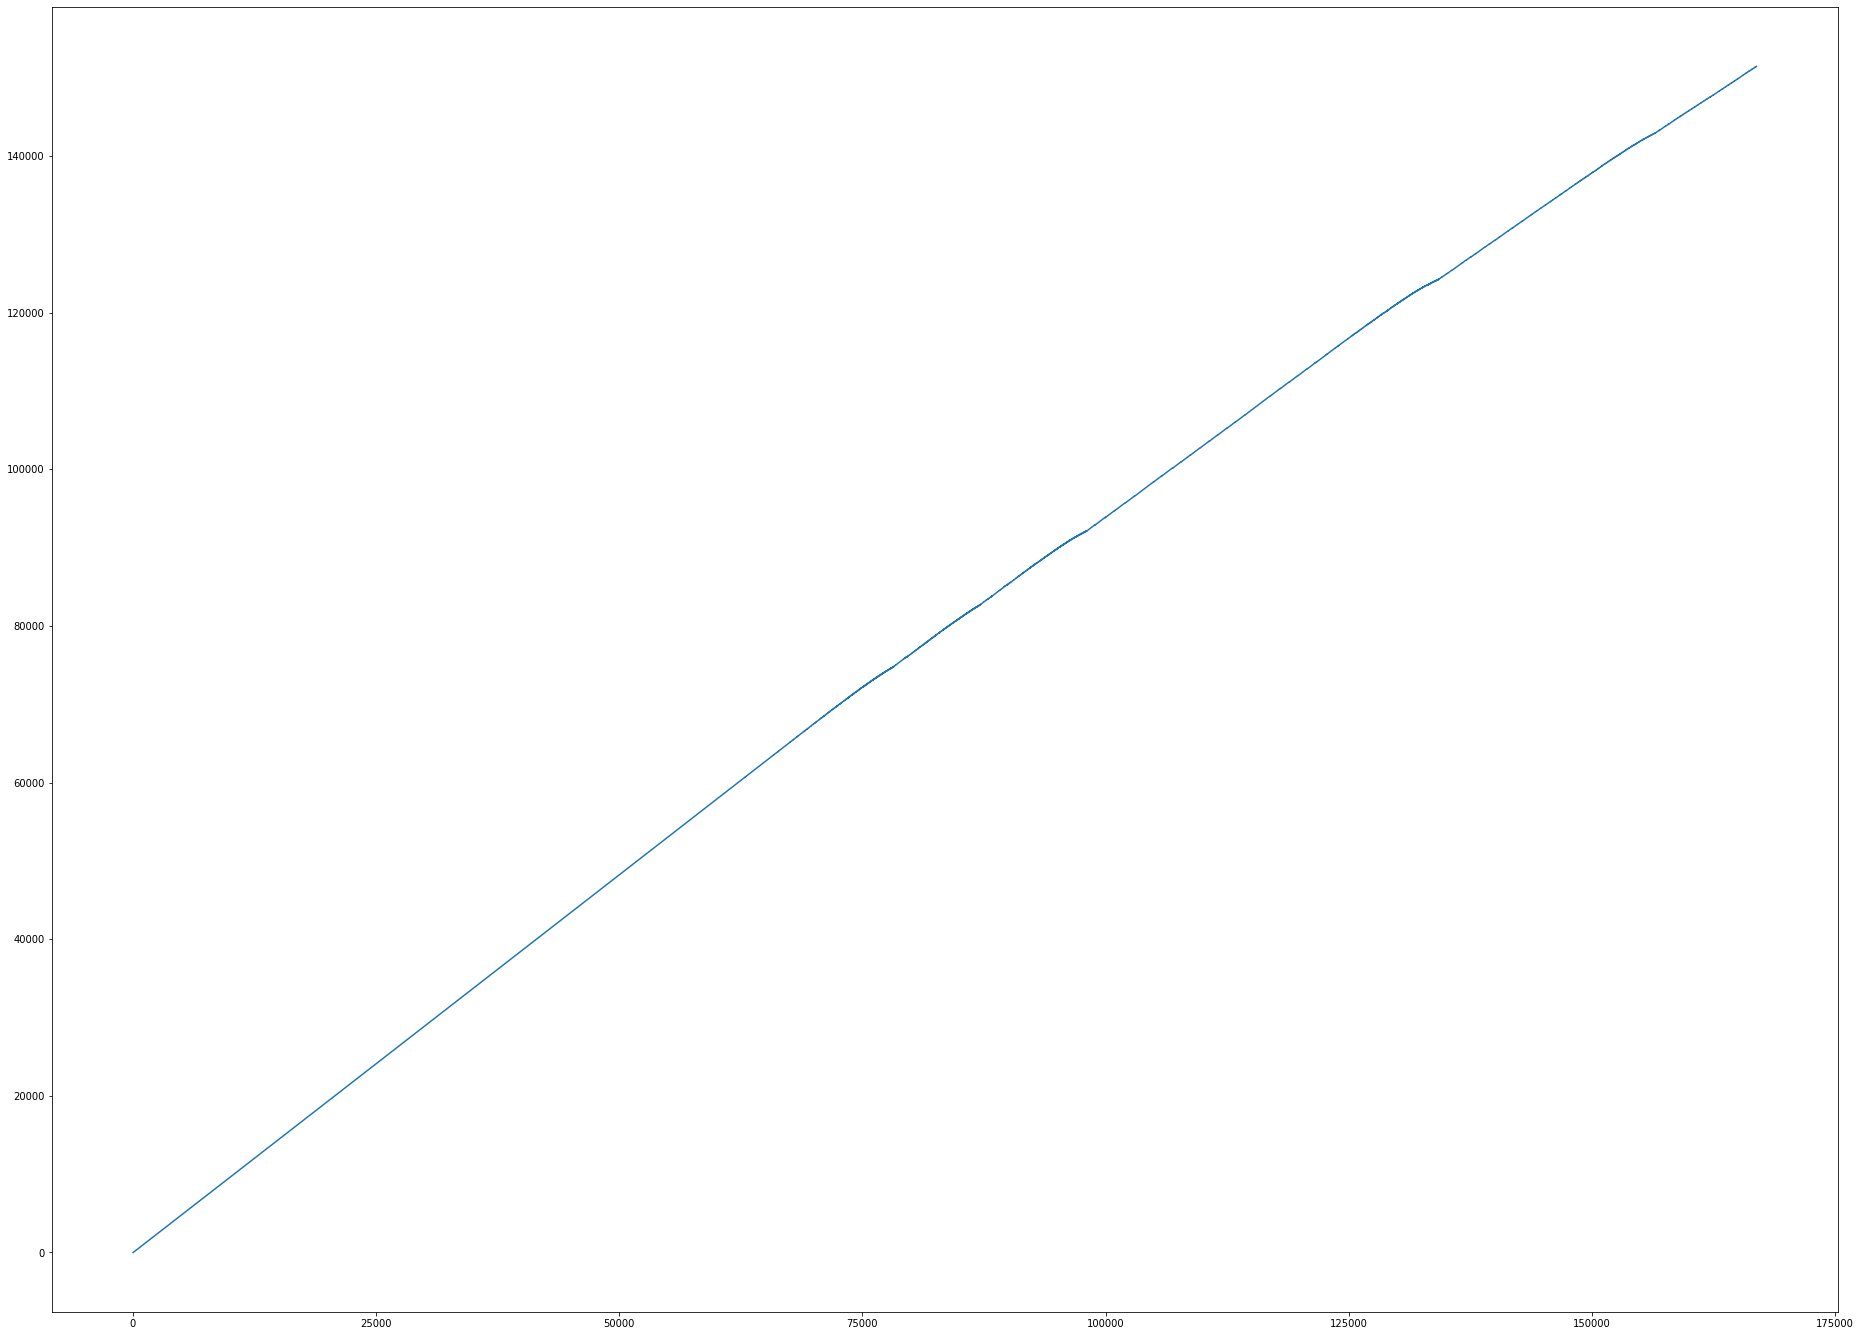

In [13]:
plt.figure(figsize=(32, 24))
plt.plot(new_sequence_numbers)
plt.show()

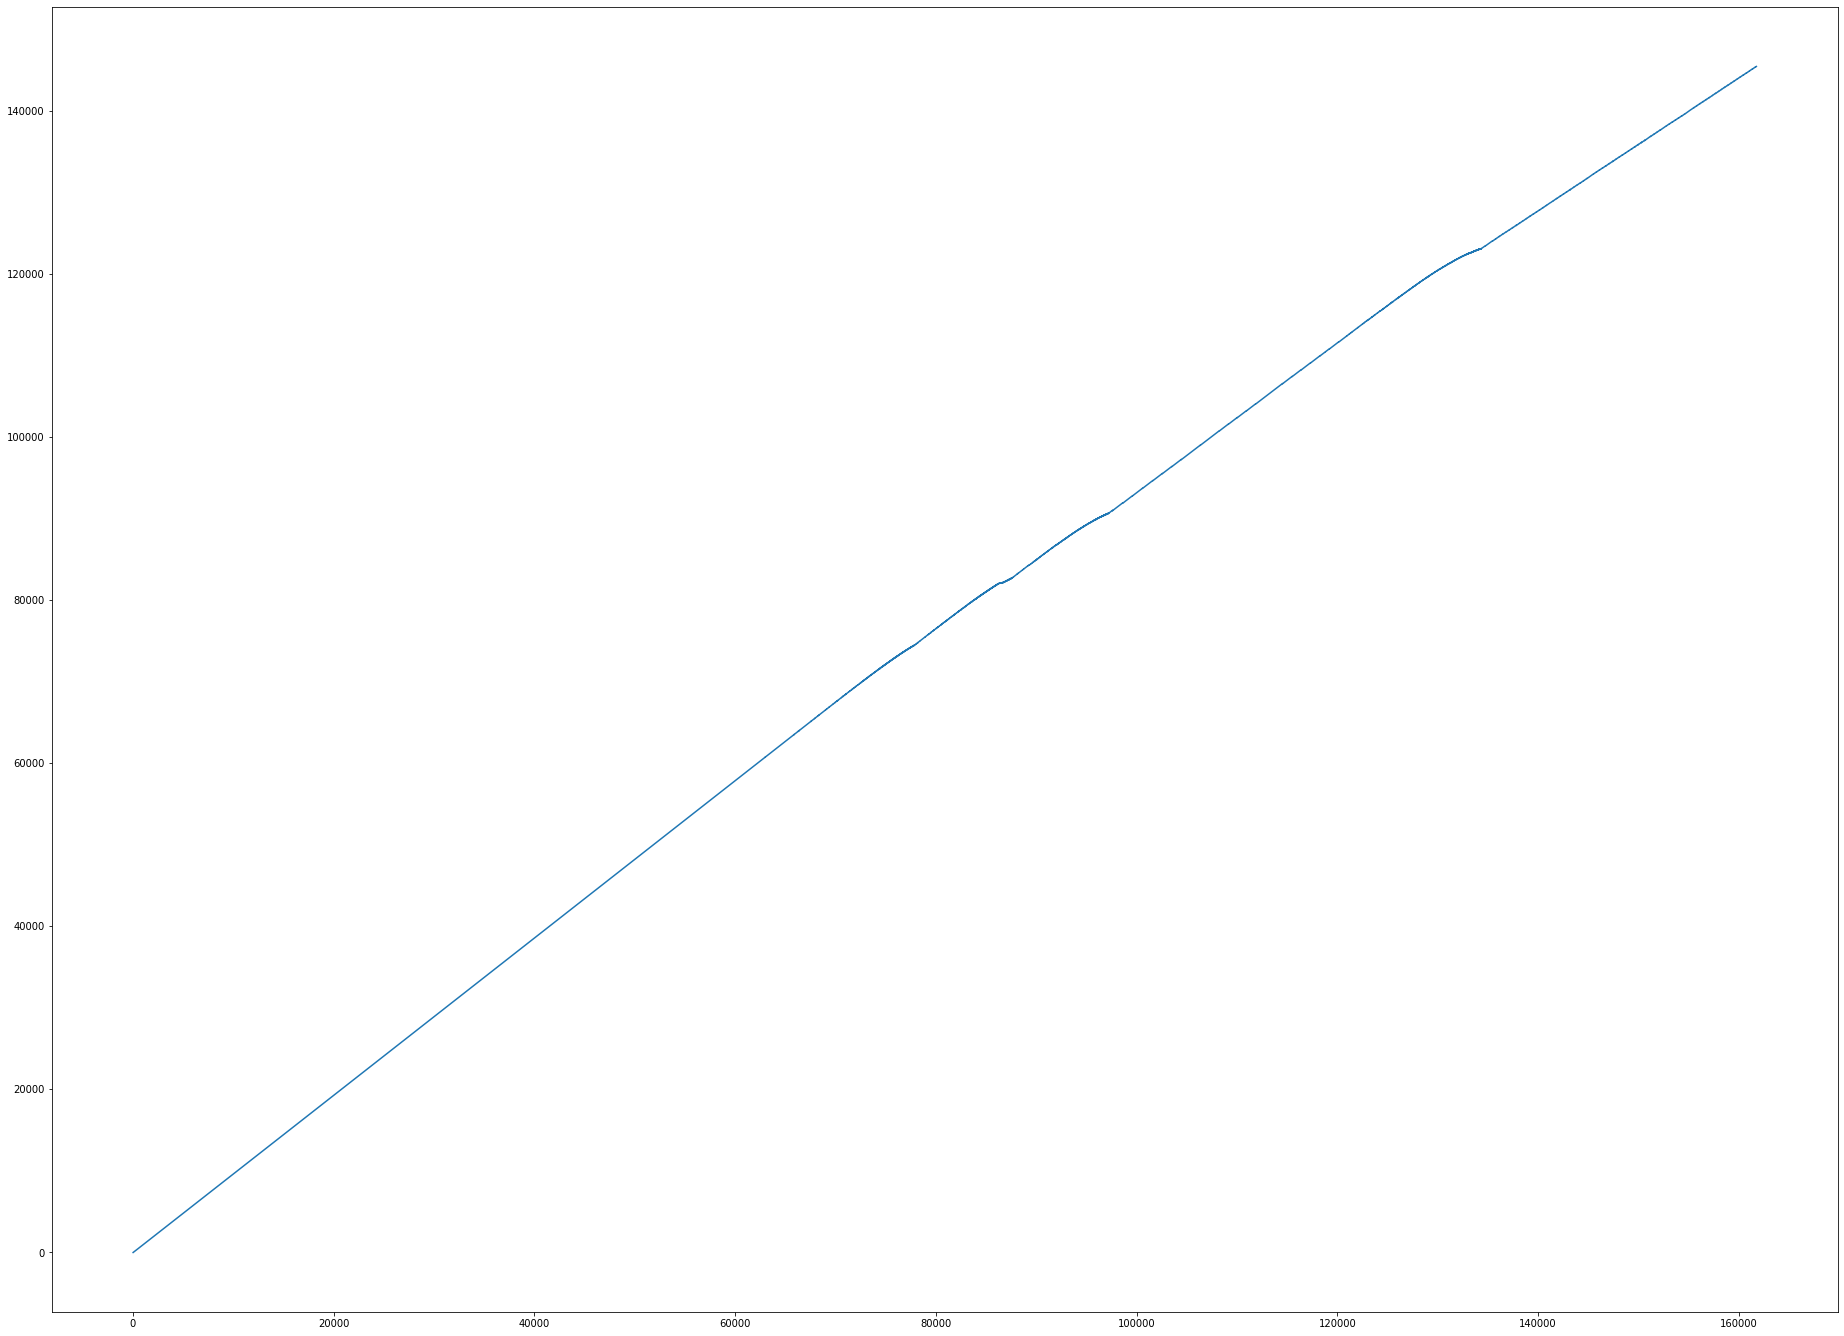

In [14]:
plt.figure(figsize=(32, 24))
plt.plot(new_sequence_numbers_plus)
plt.show()

In [15]:
print(udp_packets.head())
print(udp_packets_plus.head())

    No.      Time       Source  Destination Protocol  Length  Sequence number  \
15   16  0.407359  192.168.1.1  192.168.1.2      UDP    1524              0.0   
16   17  0.407359  192.168.1.1  192.168.1.2      UDP    1524              1.0   
17   18  0.407359  192.168.1.1  192.168.1.2      UDP    1524              2.0   
18   19  0.407359  192.168.1.1  192.168.1.2      UDP    1524              3.0   
19   20  0.407359  192.168.1.1  192.168.1.2      UDP    1524              4.0   

    MCS index  A-MPDU reference number                             Retry  \
15        6.0                      0.0  Frame is not being retransmitted   
16        6.0                      0.0  Frame is not being retransmitted   
17        6.0                      0.0  Frame is not being retransmitted   
18        6.0                      0.0  Frame is not being retransmitted   
19        6.0                      0.0  Frame is not being retransmitted   

    New Sequence number  
15                  0.0  
16  

In [16]:
num_retries = np.zeros(len(udp_packets))
num_retries_plus = np.zeros(len(udp_packets_plus))

In [17]:
def count_retries(udp_packets, new_sequence_numbers, retries, num_retries):
    for i in range(0, len(udp_packets)):
        unique_sequence_number = int(new_sequence_numbers.iloc[i])
        if retries.iloc[i] == "Frame is being retransmitted":
            num_retries[unique_sequence_number] += 1

In [18]:
count_retries(udp_packets, new_sequence_numbers, retries, num_retries)
count_retries(udp_packets_plus, new_sequence_numbers_plus, retries_plus, num_retries_plus)

In [19]:
print(num_retries.min())
print(num_retries.max())

print(num_retries_plus.min())
print(num_retries_plus.max())

0.0
3.0
0.0
5.0


/home/EU/dedevarr/NS3-analysis/nsvenv/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


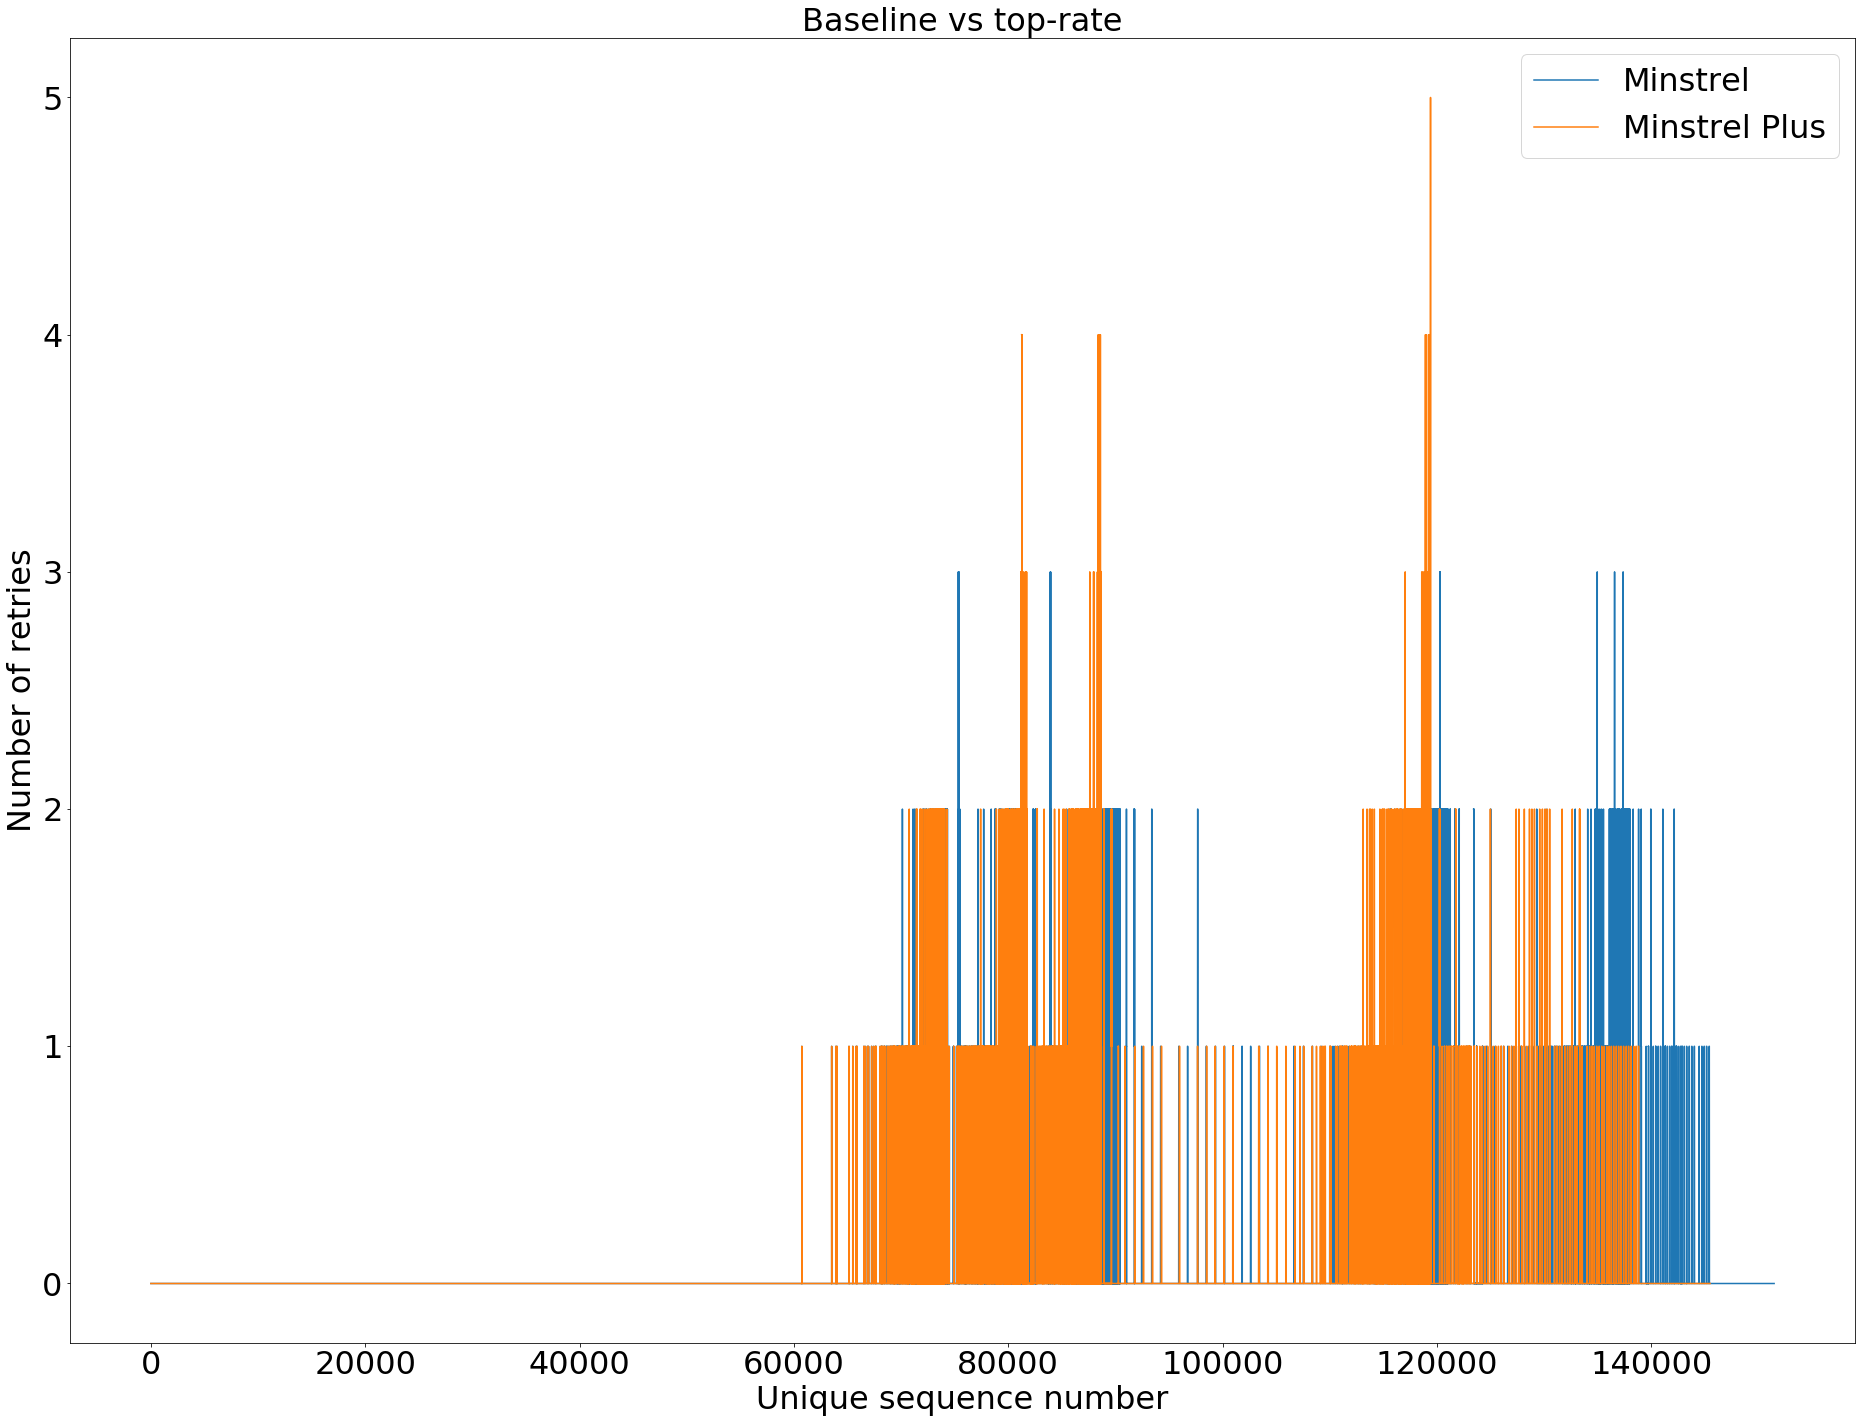

In [20]:
plt.figure(figsize=(32, 24))
plt.plot(new_sequence_numbers, num_retries, label="Minstrel")
plt.plot(new_sequence_numbers_plus, num_retries_plus, label="Minstrel Plus")
plt.title("Baseline vs top-rate", fontsize=32)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.xlabel("Unique sequence number", fontsize=32)
plt.ylabel("Number of retries", fontsize=32)
plt.legend(prop={'size':32})
plt.show()

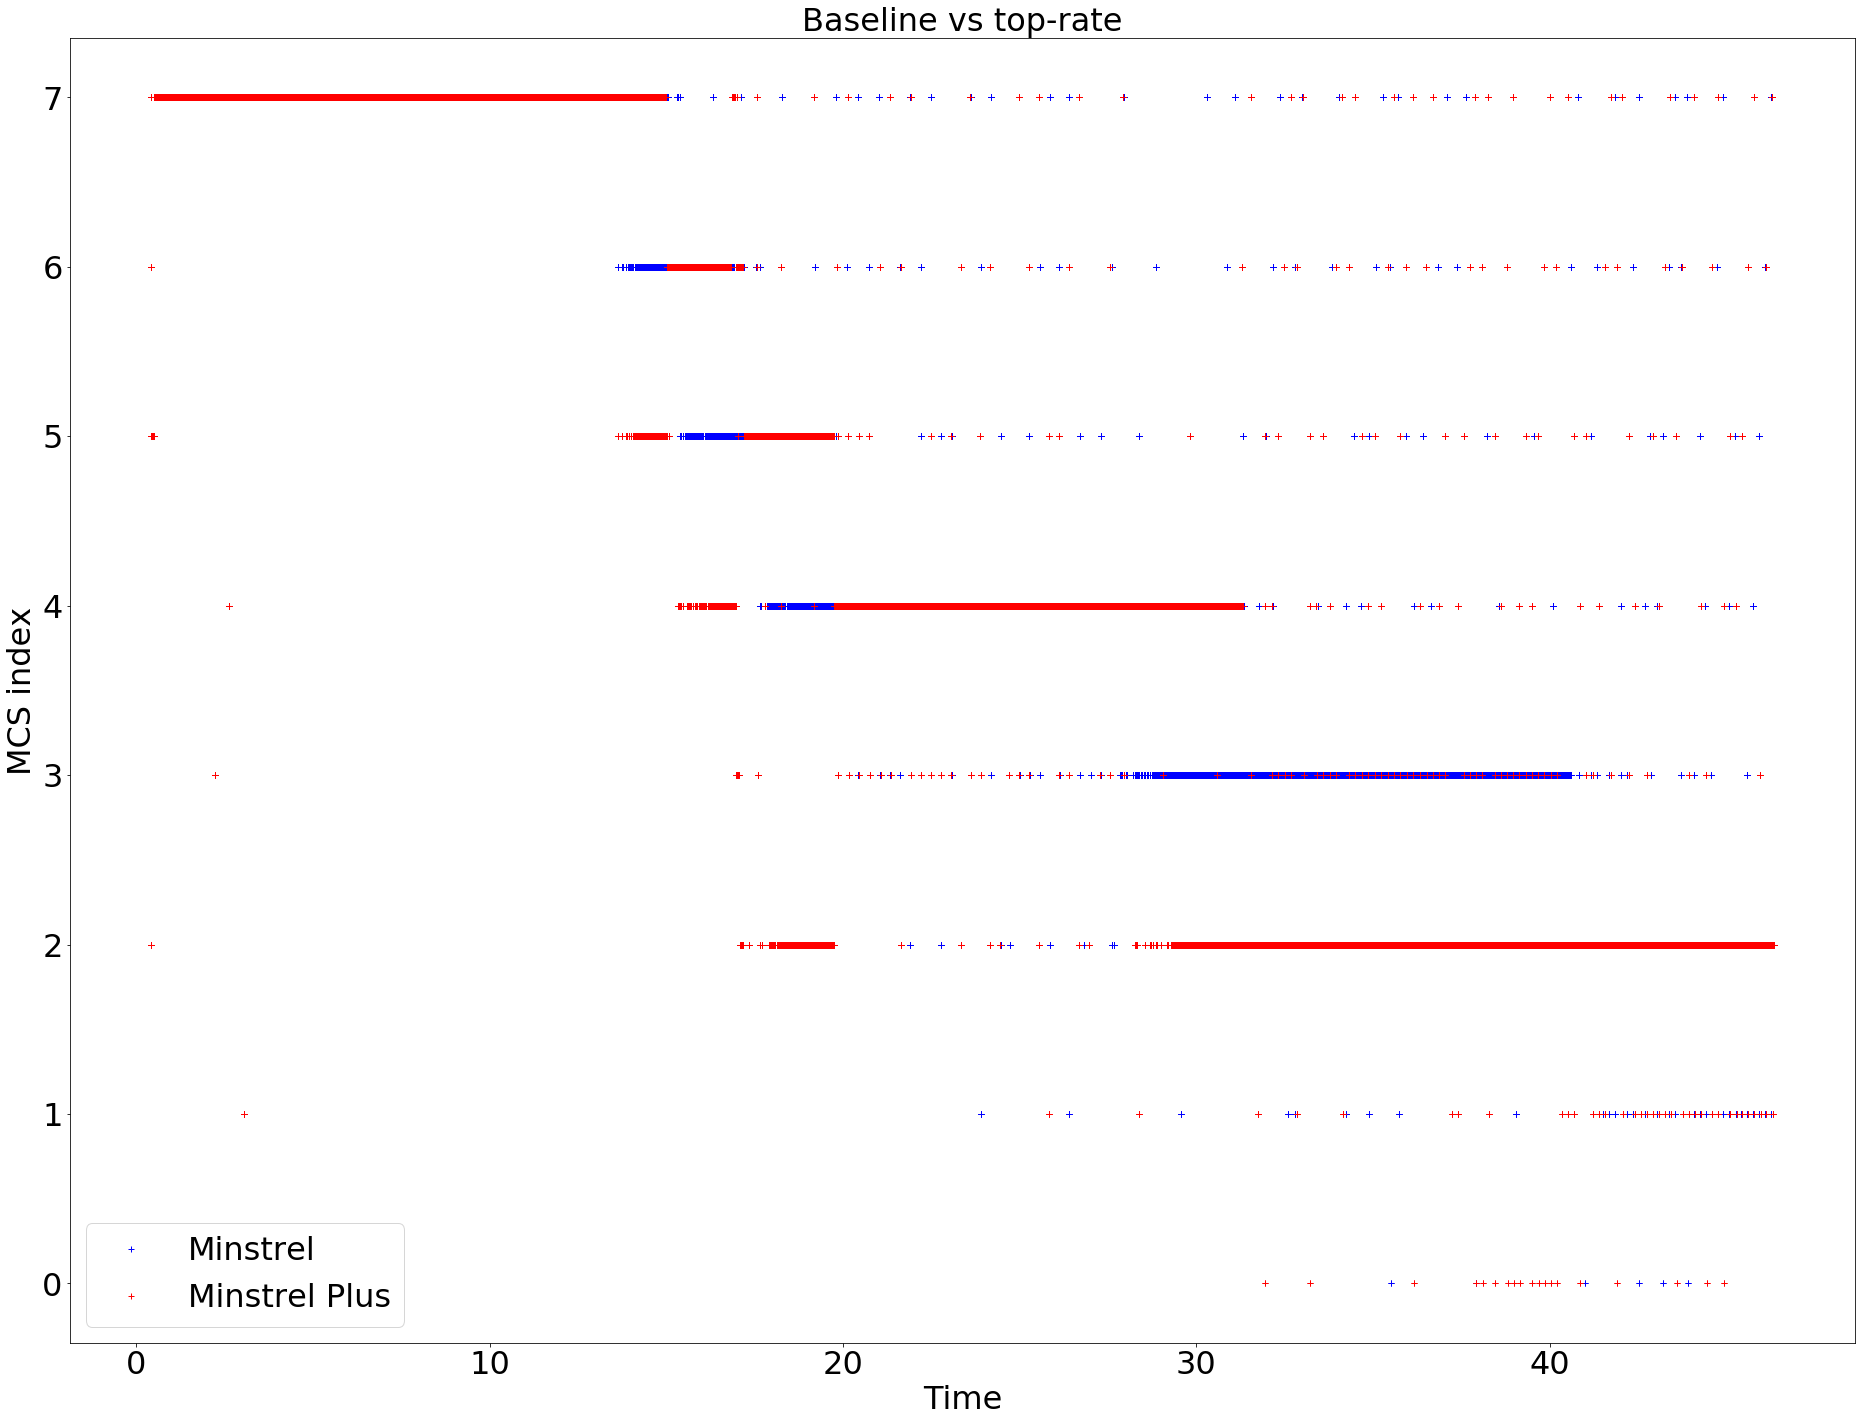

In [21]:
plt.figure(figsize=(32, 24))
plt.plot(time, mcs_values, 'b+', label="Minstrel")
plt.plot(time_plus, mcs_values_plus, 'r+', label="Minstrel Plus")
plt.title("Baseline vs top-rate", fontsize=32)
plt.legend(prop={'size':32})
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.xlabel("Time", fontsize=32)
plt.ylabel("MCS index", fontsize=32)
plt.show()

In [22]:
def calculate_throughput(time, sta_packets_len, data):
    start_time = time.iloc[0]
    #print(start_time)
    throughput_values = []
    curr_time = start_time
    i = 0
    while i < sta_packets_len:
        total_bytes = 0
        while i < sta_packets_len and time.iloc[i] < curr_time + 1.0:
            total_bytes += data.iloc[i]
            i += 1
        throughput_values.append(total_bytes*8/1000000)
        curr_time = time.iloc[i-1]
        if i < sta_packets_len and time.iloc[i] > curr_time + 1.0:
            throughput_values.append(0)
            i += 1
    return throughput_values

In [23]:
throughput_values = calculate_throughput(sta_time, len(sta_packets), data)
throughput_values_plus = calculate_throughput(sta_time_plus, len(sta_packets_plus), data_plus)
print(len(throughput_values))
print(len(throughput_values_plus))
throughput = np.asarray(throughput_values)
throughput_plus = np.asarray(throughput_values_plus)

47
47


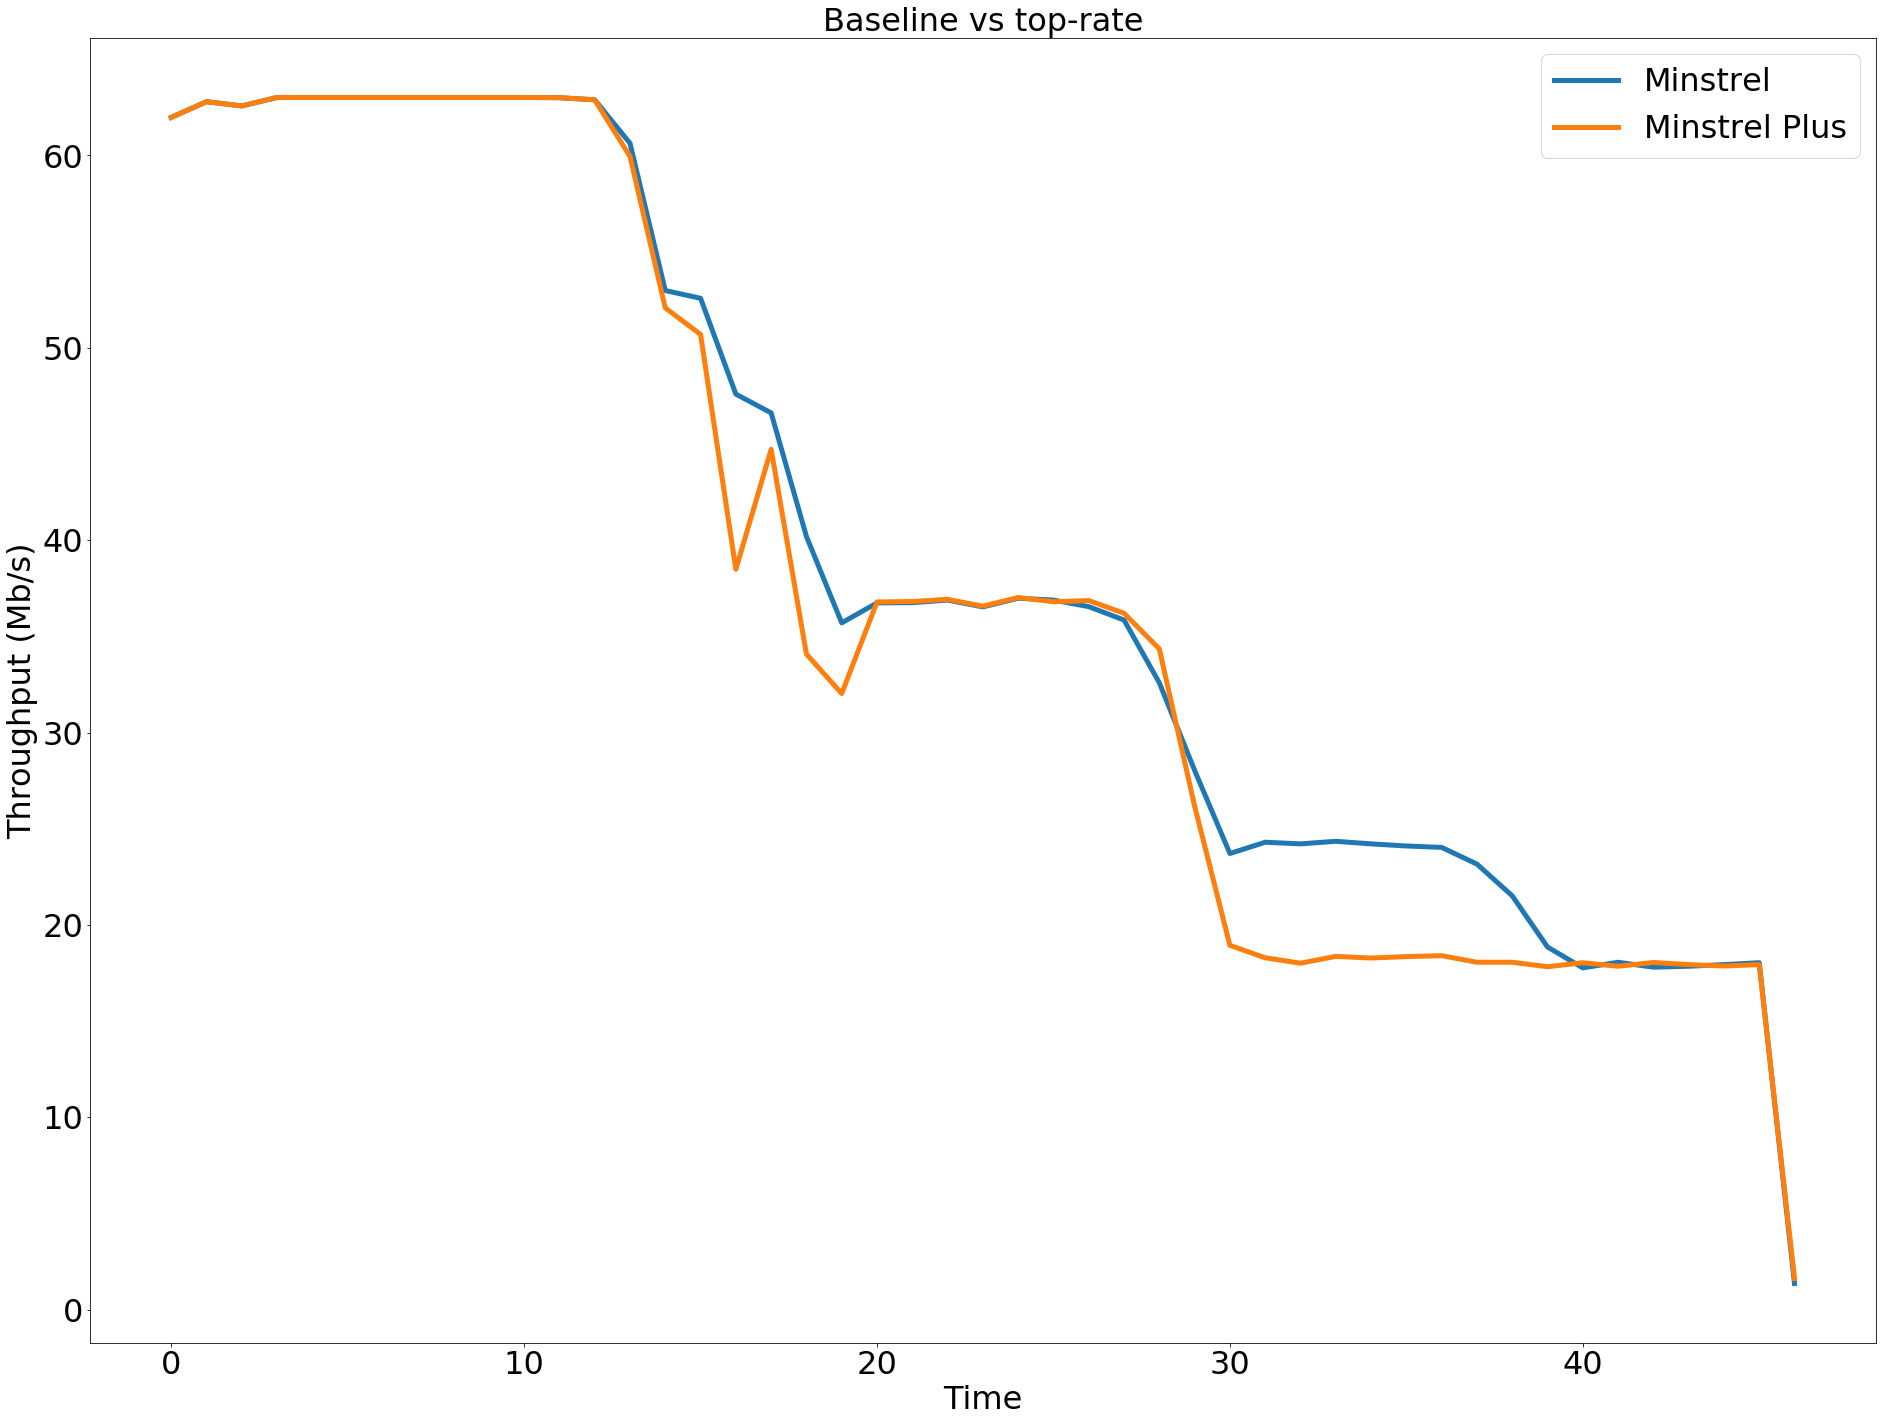

In [24]:
plt.figure(figsize=(32, 24))
plt.title("Throughput")
plt.plot(throughput, label="Minstrel", linewidth=5)
plt.plot(throughput_plus, label="Minstrel Plus", linewidth=5)
plt.title("Baseline vs top-rate", fontsize=32)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.xlabel("Time", fontsize=32)
plt.ylabel("Throughput (Mb/s)", fontsize=32)
plt.legend(prop={'size':32})
plt.show()

In [25]:
print(ampdu_ref.isna().sum())
print(ampdu_ref_plus.isna().sum())

0
0


In [26]:
def remove_null_ampdus(ampdu_ref):
    offset = 0
    for i in range(0, len(ampdu_ref)):
        if np.isnan(ampdu_ref.iloc[i]):
            offset += 1
            ampdu_ref.iat[i] = int(ampdu_ref.iloc[i-1]) + 1
        else:
            ampdu_ref.iat[i] = int(ampdu_ref.iloc[i]) + offset
    return ampdu_ref

In [27]:
ampdu_ref = remove_null_ampdus(ampdu_ref)
ampdu_ref_plus = remove_null_ampdus(ampdu_ref_plus)

print(ampdu_ref.isna().sum())
print(ampdu_ref_plus.isna().sum())

0
0


In [28]:
print(ampdu_ref.tail())

166913    8435.0
166914    8435.0
166915    8435.0
166916    8435.0
166917    8435.0
Name: A-MPDU reference number, dtype: float64


In [29]:
def calculate_ampdu(udp_packets, time, ampdu_ref):
    last_ampdu_ref = int(udp_packets.iloc[len(udp_packets) - 1]["A-MPDU reference number"])
    print(last_ampdu_ref)
    time_index = np.zeros(last_ampdu_ref + 1)
    ampdu_sizes = np.zeros(last_ampdu_ref + 1)

    for i in range(0, len(udp_packets)):
        current_ampdu_ref = int(ampdu_ref.iloc[i])
        if time_index[current_ampdu_ref] == 0:
            time_index[current_ampdu_ref] = time.iloc[i]
        if current_ampdu_ref >= 0:
            ampdu_sizes[current_ampdu_ref] += 1
    return time_index, ampdu_sizes

In [30]:
time_index, ampdu_sizes = calculate_ampdu(udp_packets, time, ampdu_ref)
time_index_plus, ampdu_sizes_plus = calculate_ampdu(udp_packets_plus, time_plus, ampdu_ref_plus)

8435
8482


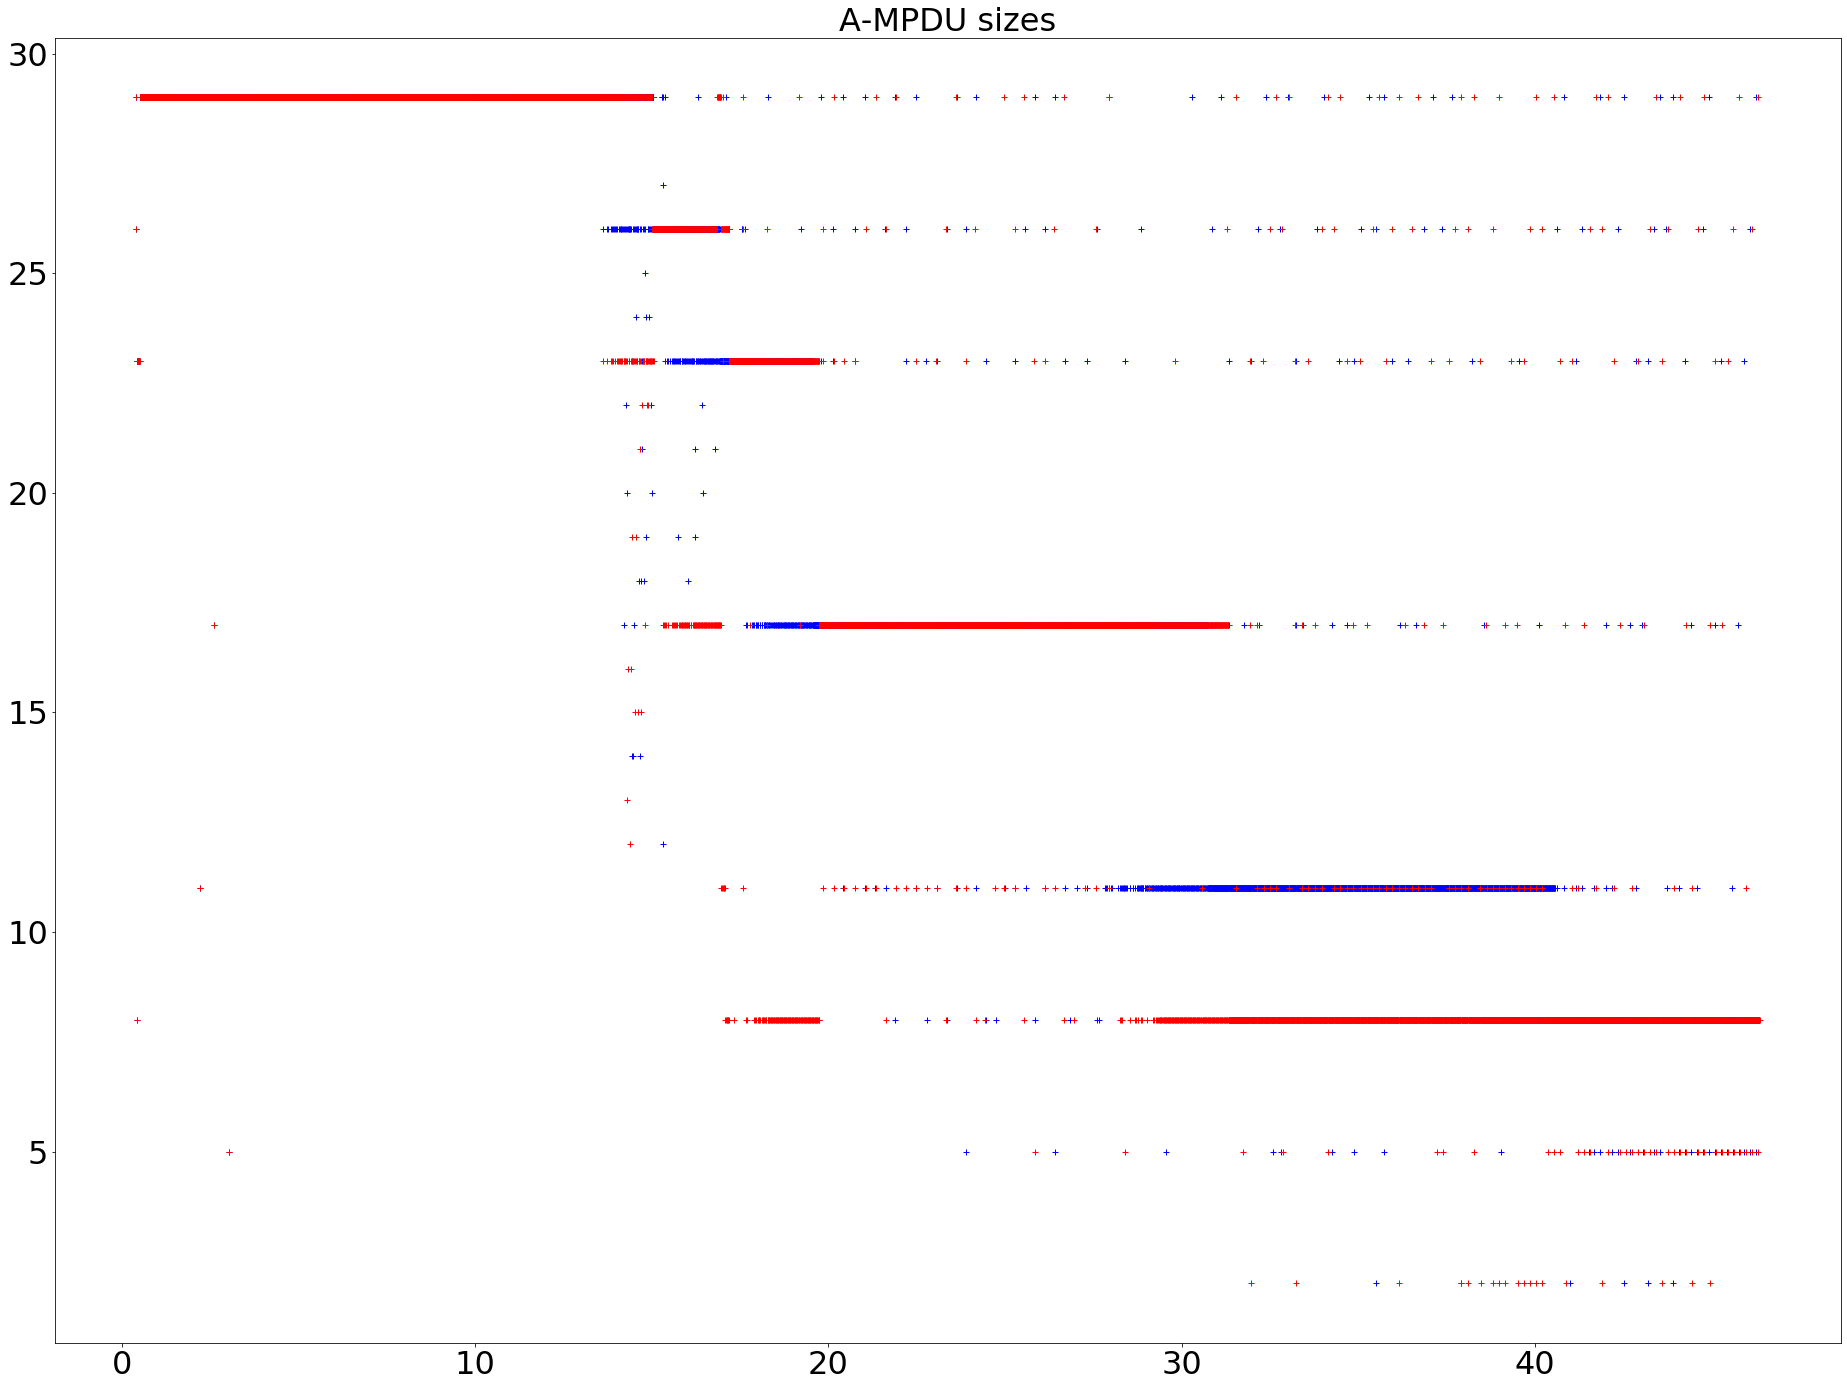

In [31]:
plt.figure(figsize=(32, 24))
plt.plot(time_index, ampdu_sizes, 'b+')
plt.plot(time_index_plus, ampdu_sizes_plus, 'r+')
plt.title("A-MPDU sizes", fontsize=32)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.show()